<h1>Machine Learning for Medical Imaging - Exercise Random Forests</h1>

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn import tree
import h5py

<h3>Exercise 1 - Objective Functions</h3>
<p>You are provided with a two-class dataset in hdf5 format. In this exercise you should implement the evaluation step using either information gain or gini impurity, which is used to decide the best split in a node of a decision tree. You are given part of the code and should fill in the gaps, where specified. All necessary libraries are already given in the import statements, no additional libraries are needed for this exercise.</p>
<p><b>Group A and B use information gain as split criterion.</b></p>
<p><b>Group C and D use the gini impurity as split criterion.</b></p>

<h4>Information Gain</h4>
<p><p>The information gain is given by the following function: </p>
$$I_{gain} = H(S) - \frac{\lvert S_L \rvert}{\lvert S \rvert} H(L) - \frac{\lvert S_R \rvert}{\lvert S \rvert}H(R),$$
<p>where S is the set of samples reaching a particular split node. S<sub>L</sub> and S<sub>R</sub> are the subsets of samples that are assigned to the left and right child nodes respectively.</p>
<p>H(S) is the entropy, evaluated as:</p>
$$H(S) = -\sum_{\forall c} p(c) log(p(c)),$$
<p>where p(c) is the probability of choosing a sample of class c in the set S.</p>
<p> <b>Group A:</b> Use the SpiralData-2 dataset for this exercise. </p>
<p> <b>Group B:</b> Use the TwistData-2 dataset for this exercise. </p></p>
<h4>Gini Impurity</h4>
<p>The gini impurity for a set Y is given by the following function: </p>
$$G(S) = 1 - \sum_{\forall c} p_c^2,$$
<p>where c are the available classes and p<sub>c</sub> the probability of choosing a sample of class c, given the set Y.</p>
<p>The gini index for a split node for a particular attribute is then given by:</p>
$$I_{gini} = \sum_{n \in l,r}\frac{\lvert S_n \rvert}{\lvert S \rvert} G(S_n),$$
<p>where S<sub>n</sub> are the sets of samples forwarded to the left and right split nodes and S is the set of samples reaching the split node.</p>
<p> <b>Group C:</b> Use the SpiralData-2 dataset for this exercise. </p>
<p> <b>Group D:</b> Use the TwistData-2 dataset for this exercise. </p>

In [3]:
h5f = h5py.File('data/SpiralData-2.hdf5','r')
#h5f = h5py.File('TwistData-2.hdf5','r')
X = h5f['data'][:]
Y = h5f['labels'][:]


In [4]:
def form_groups(index,value,X):
    split_index = (X[:,index] <= value)
    l_x  = X[split_index,:]
    l_y  = Y[split_index]
    r_x  = X[~split_index,:]
    r_y  = Y[~split_index]
    return l_x, l_y, r_x, r_y

def entropy_measure(x):
    
    if x.shape[0]==0:
        return 0
    c_1 = x[x==1.0].shape[0]
    
    c_2 = x[x==2.0].shape[0]
    
    p_c_1 = float(c_1) / float(x.shape[0])
    p_c_2 = float(c_2) / float(x.shape[0])
    if p_c_1 ==0:
        return -p_c_2*np.log(p_c_2) 
    elif p_c_2 == 0:
        return -p_c_1*np.log(p_c_1) 
    else:
        return -(p_c_2*np.log(p_c_2) + p_c_1*np.log(p_c_1))
        
        
        
    

In [5]:
classes = 2
best_gain = 0.0
best_index = 0
value = 0.0
# go through each data point and every label to find the best split
for index in range(0, X.shape[1]):
    for row in range(0, X.shape[0]):
        # use the form_groups function to divide the data according to the current feature value
        l_x, l_y, r_x, r_y = form_groups(index, X[row, index], X)
        # compute the split  criterion according to the current split
        
        h_s = entropy_measure(Y)
        h_l = entropy_measure(l_y)
        h_r = entropy_measure(r_y)
        
        I_gain = h_s  - (l_x.shape[0]/float(X.shape[0]))*h_l - (r_x.shape[0]/float(X.shape[0]))*h_r
        
        # if you have found a better split, save the feature value, index, information gain, and the two groups
        if I_gain > best_gain:
            best_gain = I_gain
            best_index = index 
            value = X[row, index]
 
print(best_gain)
print(best_index)
print(value)

0.117276936779
1
-0.45008189


In [6]:
l_x,l_y,r_x,r_y = form_groups(best_index,value,X)


<p>Now given the computed best split, compare your results (split value, feature index, resulting accuracy) with the implementation of a decision tree classifier in scikit-learn. Set the parameters to train the forest accordingly, the maximum depth, evaluation criteria and number of features and samples to use.
</p>

0.65
0.65


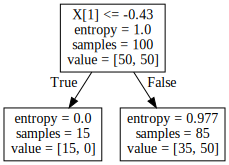

In [7]:
## compute the accuracy of your found split
c1_correct = l_y[l_y==1.0].shape[0]
c2_correct = r_y[r_y==2.0].shape[0]
accuracy = float(c1_correct + c2_correct)/float(Y.shape[0])
print(accuracy)
# Test your decision tree on the same data and compute its accuracy using the 'score' function
score = 0
clf = tree.DecisionTreeClassifier(criterion ='entropy', max_depth = 1)
clf = clf.fit(X, Y)
score = clf.score(X,Y)
print(score)

# plot the resulting tree,clf, using graphviz and compare to your results.
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)  
graph

<h3>Exercise 1 - Random Forests</h3>
<p>In this part of the exercise, different parameters of random forests like the number of trees or the depth should be explored.
<p> For this, you are provided with a three-class dataset: </p>
<table>
    <tr>
        <td style="text-align:center"> Twist Dataset</td><td style="text-align:center">Spiral Dataset</td></tr><tr>
        <td><img src="data/twist.png"></td><td> <img src="data/spiral.png"></td>
    </tr>
</table>
<p>Spilt the data randomly into two folds to create a training and a test set.</p>

In [12]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

h5f = h5py.File('data/SpiralData-3.hdf5','r')
#h5f = h5py.File('TwistData-3.hdf5','r')

X = h5f['data'][:]
Y = h5f['labels'][:]
classes = 3
# split the data into two folds
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state=55)

<p> a. Train a random forest classifier on your training set using the split function assigned to your group.</p>

In [13]:
clf = RandomForestClassifier(n_estimators=50, criterion = 'entropy') # Default split function is gini
clf.fit(X_train, Y_train.ravel())
score = clf.score(X_test, Y_test.ravel())
print(score)

1.0


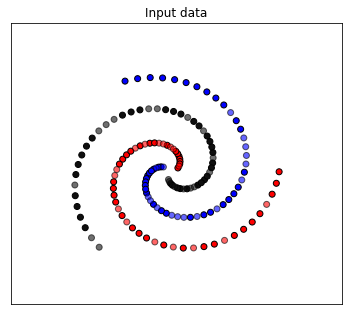

In [14]:
h= 0.02
i= 1
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
figure = plt.figure(figsize=(70,30))
ax =plt.subplot(5, 10,i)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF','#0F0F0F'])
ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train.reshape(Y_train.shape[0]), cmap=cm_bright, edgecolors='k')
ax.set_title("Input data")
ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test.reshape(Y_test.shape[0]), cmap=cm_bright, alpha=0.6, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
plt.show()



<h3>Evaluation</h3>
<p> b. Train RF classifiers varying the number of trees (1,25,...,50) and observe the accuracy of your classifier on the test set, as well as the decision boundaries plotting curves like shown in:
http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
You will have to adapt the plot according to the number of classes.</p>
<p>c. For fixed number of trees (say, 10) vary the depth of the classifiers from 2,3,..8.
Plot similar curves as 1(b).</p>

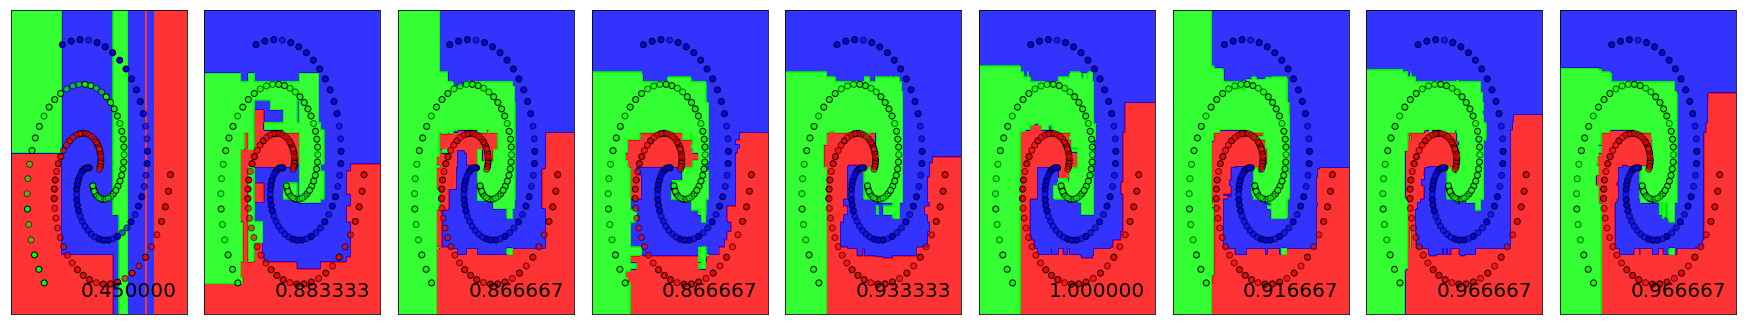

In [16]:

figure = plt.figure(figsize=(27, 9))

X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

k = 1
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00ff00'])
ax = plt.subplot(1, 6, k)
k=k+1
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cm_bright, edgecolors='k')
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

for j in [1,5,10,15,20,25,30,40,50]:
    clf = RandomForestClassifier(criterion = "entropy", max_depth=5, n_estimators=j)
    ax = plt.subplot(2, 10, k)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm_bright, alpha=.8)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cm_bright, edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ('%f' % score), size=20, horizontalalignment='right')
    k = k+1


plt.tight_layout()
plt.show()

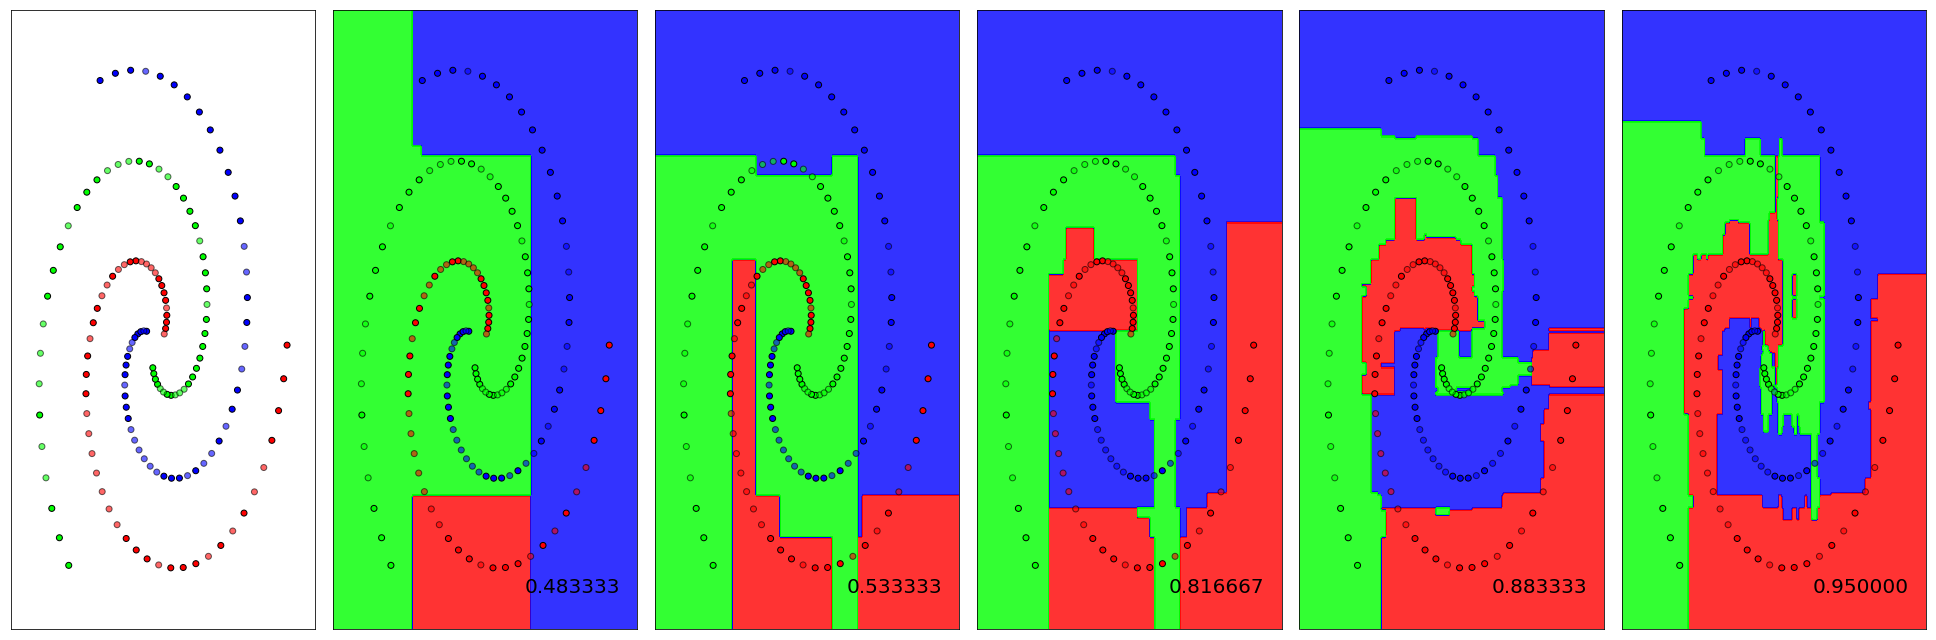

In [17]:

X = h5f['data'][:]
Y = h5f['labels'][:]

figure = plt.figure(figsize=(27, 9))

X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

k = 1
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00ff00'])
ax = plt.subplot(1, 6, k)
k=k+1
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cm_bright, edgecolors='k')
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

for j in [1,2,4,8,10]:
    clf = RandomForestClassifier(criterion = "entropy", max_depth=j, n_estimators=10)
    ax = plt.subplot(1, 6, k)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm_bright, alpha=.8)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cm_bright, edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ('%f' % score), size=20, horizontalalignment='right')
    k = k+1


plt.tight_layout()
plt.show()

<b> Comment on the classifier behavior for the above cases.</b>

<h3>Exercise 2</h3>
<p>You are given the medical dataset already known from Exercise 3 on Support Vector Machines. The dataset was one of the result from a Mexican project for the diagnosis of Chagas disease (CONACYT/SALUD-2009-C01-113848, contact: Dr. Hugo Ruiz rpina@correo.uady.mx), containing negative and positive examples of a blood parasite.</p>  
<img src="data/ex03.dataset.jpg">    
<p>Spilt the data randomly into two folds to create a training and a test set. Now, extract features of the given images. </p>
<p><b> Group A and C: </b> Extrac HoG features: You can use skimage to extract the features. (http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html)</p>
<p><b> Group B and D: </b> Extrac features using PCA: You can use sklearn to extract the features. (http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)</p>

<p>Learn a random forest classfiers, with the objective function assigned to your group in the first exercise (information gain or gini impurity), first on the vectorized images and then on your extracted features. Keep the parameters for training the forest fixed, for example maximum depth = 4 and number of trees = 10. Vary the number of features extracted and compare the resulting accuracy and out-of-bag error. (http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html)</p> 

In [11]:
from skimage.feature import hog
from skimage import color
from sklearn.model_selection import cross_val_score

## loading the data
h5f = h5py.File('data/blood_parasite.hdf5','r')
X = h5f['data'][:]
Y = h5f['labels'][:]


In [12]:
num_features = 30
features = np.empty([X.shape[0],num_features])
## extract features and save them in the given array
for i in range(0,X.shape[0]):
    hog_features = hog(X[i,:].reshape((24,24)))[0:num_features]
    features[i,:] = hog_features

/home/kishan/anaconda2/lib/python2.7/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [13]:
## split the dataset into a training and test set
X_train,X_test, Y_train, Y_test =train_test_split(X,Y, test_size = 0.2, random_state = 50)
X_train_f,X_test_f, Y_train_f, Y_test_f =train_test_split(features,Y, test_size = 0.2, random_state = 50)

## train the random forest classifier using the split criterion assigned to your group
clf_image= RandomForestClassifier(n_estimators= 10 , criterion = 'entropy', max_depth = 4, oob_score = True)
clf_feature= RandomForestClassifier(n_estimators= 10 , criterion = 'entropy', max_depth = 4, oob_score = True)

clf_image.fit(X_train, Y_train)
clf_feature.fit(X_train_f, Y_train_f)

## display the oob error
oob_error_image = 1- clf_image.oob_score_
oob_error_feature =1-  clf_feature.oob_score_

print(" Num_features : %d    |  oob_error_image :  %0.4f   |  oob_error_feature :  %0.4f"%(num_features,oob_error_image,oob_error_feature)) 


/home/kishan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/home/kishan/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/kishan/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/kishan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


 Num_features : 30    |  oob_error_image :  0.0481   |  oob_error_feature :  0.1353


<p>Perform k = 5 folded cross-validation, i.e., split data into 5 folds and use 4 folds for training and 1 fold for testing.</p>

In [15]:
clf_image= RandomForestClassifier(n_estimators= 10 , criterion = 'entropy', max_depth = 4, oob_score = True)
clf_feature= RandomForestClassifier(n_estimators= 10 , criterion = 'entropy', max_depth = 4, oob_score = True)

scores = cross_val_score(clf_image,X,Y.ravel(),cv=5)
print(scores)

[ 0.97244624  0.98924731  0.92069892  0.9603228   0.9737727 ]
